https://drive.google.com/file/d/1Ap5D7rkcX0E2nxAACJzCrS96QAjs7bt5/view?usp=share_link

In [111]:
! gdown --id 1Ap5D7rkcX0E2nxAACJzCrS96QAjs7bt5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ap5D7rkcX0E2nxAACJzCrS96QAjs7bt5
To: /content/car.zip
100% 1.15M/1.15M [00:00<00:00, 129MB/s]


In [57]:
! unzip /content/car.zip -d /content/Car_sels

Archive:  /content/car.zip
replace /content/Car_sels/audi.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns

In [189]:
df_audi = pd.read_csv('/content/Car_sels/audi.csv')

In [190]:
df_audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [191]:
df = df_audi

In [192]:
train, test = train_test_split(df)

<Axes: >

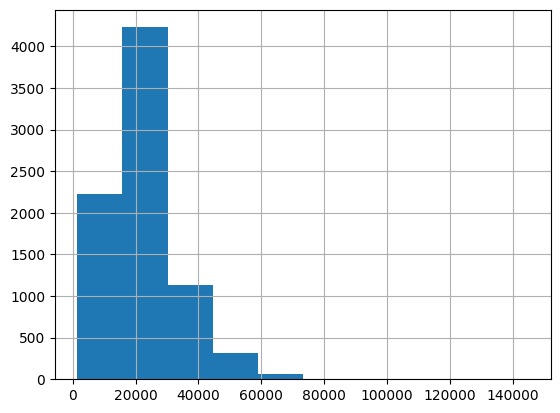

In [193]:
train['price'].hist()

In [194]:
train.groupby('year')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
1997,1,4650.000000,4650.0
1998,1,4999.000000,4999.0
2002,2,2433.000000,2433.0
2003,5,3591.000000,2495.0
2004,4,4569.500000,3792.0
2005,6,3090.000000,2942.5
2006,7,6550.571429,3895.0
2007,13,8032.230769,4999.0
2008,19,6209.736842,4495.0


<Axes: xlabel='year'>

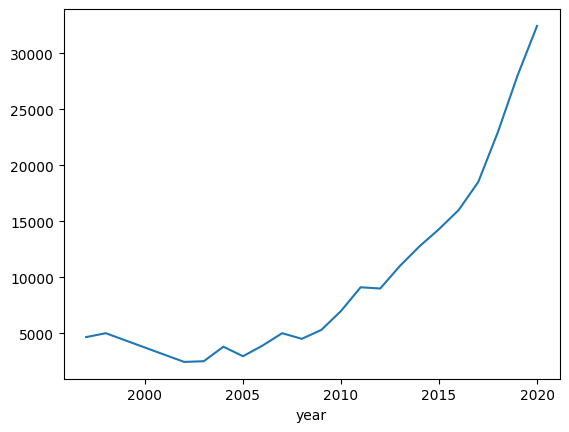

In [195]:
train.groupby('year')['price'].median().plot()

In [196]:
train['price_pred_median'] = train['price'].median()

In [197]:
train['error'] = abs(train['price_pred_median'] - train['price'])

In [198]:
train['error_pct'] = train['error'] / train['price']

In [199]:
test['price_pred_median'] = test['price'].median()
test['error'] = abs(test['price_pred_median'] - test['price'])
test['error_pct'] = test['error'] / test['price']

In [200]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,error,error_pct
2325,A4,2018,16980,Manual,27954,Petrol,150,53.3,1.4,20452.0,3472.0,0.204476
5619,RS5,2018,42500,Semi-Auto,28249,Petrol,145,32.5,2.9,20452.0,22048.0,0.518776
2402,A3,2016,13992,Semi-Auto,56136,Diesel,125,61.4,2.0,20452.0,6460.0,0.461692
5482,Q3,2019,26000,Manual,2000,Diesel,145,42.8,2.0,20452.0,5548.0,0.213385
3621,A3,2016,14991,Manual,30000,Diesel,20,67.3,2.0,20452.0,5461.0,0.364285
...,...,...,...,...,...,...,...,...,...,...,...,...
6756,A4,2016,15990,Manual,46778,Diesel,30,62.8,2.0,20452.0,4462.0,0.279049
137,Q3,2016,15500,Automatic,11863,Diesel,160,50.4,2.0,20452.0,4952.0,0.319484
810,A4,2017,17795,Semi-Auto,26752,Diesel,145,64.2,2.0,20452.0,2657.0,0.149312
5707,R8,2019,116000,Automatic,2369,Petrol,145,22.6,5.2,20452.0,95548.0,0.823690


In [201]:
model_year_median = train.groupby('year')['price'].median().reset_index()

In [202]:
model_year_median.columns = ['year', 'price_pred_year_median']

In [203]:
train = train.merge(model_year_median, how='left', on = 'year')

In [204]:
mean_absolute_error(train['price'], train['price_pred_year_median'])

5393.096862892138

In [205]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_median'])

0.22097232414240797

In [206]:
test = test.merge(model_year_median, how='left', on = 'year')

In [207]:
test.isna().mean()

model                     0.0
year                      0.0
price                     0.0
transmission              0.0
mileage                   0.0
fuelType                  0.0
tax                       0.0
mpg                       0.0
engineSize                0.0
price_pred_median         0.0
error                     0.0
error_pct                 0.0
price_pred_year_median    0.0
dtype: float64

In [208]:
test = test[test['price_pred_year_median'].notna()]

In [209]:
mean_absolute_error(test['price'], test['price_pred_year_median'])

5543.759842519685

In [210]:
mean_absolute_percentage_error(test['price'], test['price_pred_year_median'])

0.22153163960103261

In [211]:
train.groupby('engineSize')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
engineSize,,,
0.0,44,29658.818182,30495.0
1.0,429,16042.051282,15300.0
1.2,25,10416.400000,9999.0
1.4,1211,15716.159372,15495.0
1.5,536,24458.139925,23992.5
1.6,693,15889.468975,15998.0
1.8,95,14455.642105,15763.0
1.9,3,2476.666667,2490.0
2.0,3877,22539.698994,21750.0


In [212]:
def engine_group(x) :
  if x <= 1.4 :
    return '<= 1.4'
  if x <= 1.9 :
    return '<= 1.9'
  if x <= 2.9 :
    return '<= 2.9'
  return '>3'

In [213]:
train['engine_group'] = train['engineSize'].apply(engine_group)

In [214]:
t = train.groupby('engine_group')['price'].agg(['count', 'mean', 'median'])

In [215]:
t

,count,mean,median
engine_group,,,
<= 1.4,1709,16079.407256,15498.0
<= 1.9,1327,19217.544084,20500.0
<= 2.9,3968,23041.073589,21995.0
>3,997,38443.679037,36990.0


In [216]:
model_year_engine_median = train.groupby(['year', 'engine_group'])['price'].median().reset_index()

In [217]:
model_year_engine_median

,year,engine_group,price
0,1997,>3,4650.0
1,1998,<= 1.9,4999.0
2,2002,<= 1.9,2433.0
3,2003,<= 1.4,2490.0
4,2003,<= 1.9,3240.0
...,...,...,...
65,2019,>3,46800.0
66,2020,<= 1.4,22990.0
67,2020,<= 1.9,26495.0
68,2020,<= 2.9,32995.0


In [218]:
t = train.pivot_table(index = 'year', columns='engine_group', values= 'price', aggfunc='median')

<Axes: xlabel='engine_group', ylabel='year'>

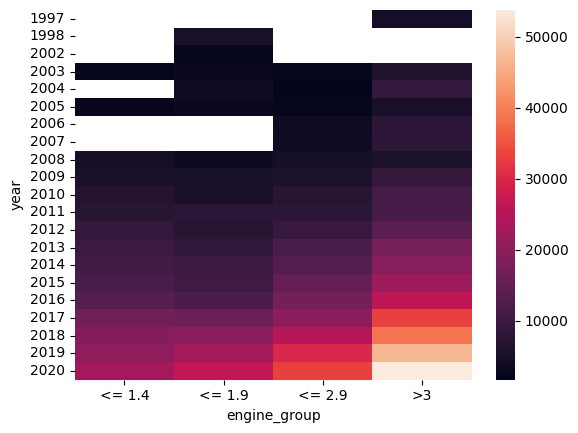

In [219]:
sns.heatmap(t)

In [220]:
model_year_engine_median = model_year_engine_median.rename({'price' : 'price_pred_year_engine'}, axis=1)

In [221]:
train = train.merge(model_year_engine_median, how='left', on = ['year', 'engine_group'])

In [222]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,error,error_pct,price_pred_year_median,engine_group,price_pred_year_engine
0,A6,2004,8995,Automatic,100730,Petrol,325,19.3,4.2,20052.0,11057.0,1.229238,3792.0,>3,8995.0
1,Q2,2019,20594,Manual,9160,Diesel,145,49.6,1.6,20052.0,542.0,0.026318,27990.0,<= 1.9,22950.0
2,A6,2019,46000,Automatic,6606,Diesel,145,36.2,3.0,20052.0,25948.0,0.564087,27990.0,>3,46800.0
3,A1,2017,12995,Manual,22427,Petrol,145,67.3,1.0,20052.0,7057.0,0.543055,18500.0,<= 1.4,16647.0
4,A6,2015,16985,Manual,34646,Diesel,30,61.4,2.0,20052.0,3067.0,0.180571,14294.0,<= 2.9,15352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,Q3,2019,25495,Manual,4995,Petrol,145,39.8,1.5,20052.0,5443.0,0.213493,27990.0,<= 1.9,22950.0
7997,A1,2017,13950,Manual,8500,Petrol,150,67.3,1.0,20052.0,6102.0,0.437419,18500.0,<= 1.4,16647.0
7998,A3,2016,15995,Semi-Auto,22219,Petrol,30,58.9,1.4,20052.0,4057.0,0.253642,15995.0,<= 1.4,13490.0
7999,Q5,2017,33990,Semi-Auto,42643,Diesel,235,42.2,3.0,20052.0,13938.0,0.410062,18500.0,>3,33202.5


In [223]:
mean_absolute_error(train['price'], train['price_pred_year_engine'])

3524.5508061492314

In [224]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_engine'])

0.15181135350755762

In [225]:
test['engine_group'] = test['engineSize'].apply(engine_group)

In [226]:
test = test.merge(model_year_engine_median, how='left', on = ['year', 'engine_group'])

In [227]:
test.isna().mean()

model                     0.000000
year                      0.000000
price                     0.000000
transmission              0.000000
mileage                   0.000000
fuelType                  0.000000
tax                       0.000000
mpg                       0.000000
engineSize                0.000000
price_pred_median         0.000000
error                     0.000000
error_pct                 0.000000
price_pred_year_median    0.000000
engine_group              0.000000
price_pred_year_engine    0.000375
dtype: float64

In [228]:
def error(y_true, y_pred) :
  print(mean_absolute_error(y_true, y_pred))
  print(mean_absolute_percentage_error(y_true, y_pred))

In [229]:
test_no_na = test.dropna().copy()

In [230]:
error(train['price'], train['price_pred_year_engine'])

3524.5508061492314
0.15181135350755762


In [231]:
error(test_no_na['price'], test_no_na['price_pred_year_engine'])

3586.4549887471867
0.15255488407245713


In [232]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,error,error_pct,price_pred_year_median,engine_group,price_pred_year_engine
0,A6,2004,8995,Automatic,100730,Petrol,325,19.3,4.2,20052.0,11057.0,1.229238,3792.0,>3,8995.0
1,Q2,2019,20594,Manual,9160,Diesel,145,49.6,1.6,20052.0,542.0,0.026318,27990.0,<= 1.9,22950.0
2,A6,2019,46000,Automatic,6606,Diesel,145,36.2,3.0,20052.0,25948.0,0.564087,27990.0,>3,46800.0
3,A1,2017,12995,Manual,22427,Petrol,145,67.3,1.0,20052.0,7057.0,0.543055,18500.0,<= 1.4,16647.0
4,A6,2015,16985,Manual,34646,Diesel,30,61.4,2.0,20052.0,3067.0,0.180571,14294.0,<= 2.9,15352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,Q3,2019,25495,Manual,4995,Petrol,145,39.8,1.5,20052.0,5443.0,0.213493,27990.0,<= 1.9,22950.0
7997,A1,2017,13950,Manual,8500,Petrol,150,67.3,1.0,20052.0,6102.0,0.437419,18500.0,<= 1.4,16647.0
7998,A3,2016,15995,Semi-Auto,22219,Petrol,30,58.9,1.4,20052.0,4057.0,0.253642,15995.0,<= 1.4,13490.0
7999,Q5,2017,33990,Semi-Auto,42643,Diesel,235,42.2,3.0,20052.0,13938.0,0.410062,18500.0,>3,33202.5


In [233]:
train.groupby('transmission')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
transmission,,,
Automatic,2034,28319.309243,26500.0
Manual,3309,16077.943487,15649.0
Semi-Auto,2658,27062.951843,24447.5


In [234]:
train.groupby('year')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
1997,1,4650.000000,4650.0
1998,1,4999.000000,4999.0
2002,2,2433.000000,2433.0
2003,5,3591.000000,2495.0
2004,4,4569.500000,3792.0
2005,6,3090.000000,2942.5
2006,7,6550.571429,3895.0
2007,13,8032.230769,4999.0
2008,19,6209.736842,4495.0


In [236]:
train['year_group'] = pd.cut(train['year'], [0,2010,2012,2014,2016,2018,float('inf')])

In [237]:
train.groupby('year_group')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year_group,,,
"(0.0, 2010.0]",98,6188.346939,4999.5
"(2010.0, 2012.0]",98,9206.683673,8994.5
"(2012.0, 2014.0]",540,13176.824074,11999.5
"(2014.0, 2016.0]",2238,16168.317248,15495.0
"(2016.0, 2018.0]",2085,21888.686331,19500.0
"(2018.0, inf]",2942,31369.786880,28900.0


In [238]:
model_year_group_engine_median = train.groupby(['year_group', 'engine_group'])['price'].median().reset_index()

In [239]:
model_year_group_engine_median = model_year_group_engine_median.rename({'price':'price_pred_year_engine_group_median'}, axis=1)

In [240]:
train = train.merge(model_year_group_engine_median, how='left', on = ['year_group', 'engine_group'])

In [241]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,error,error_pct,price_pred_year_median,engine_group,price_pred_year_engine,year_group,price_pred_year_engine_group_median
0,A6,2004,8995,Automatic,100730,Petrol,325,19.3,4.2,20052.0,11057.0,1.229238,3792.0,>3,8995.0,"(0.0, 2010.0]",7850.0
1,Q2,2019,20594,Manual,9160,Diesel,145,49.6,1.6,20052.0,542.0,0.026318,27990.0,<= 1.9,22950.0,"(2018.0, inf]",23450.0
2,A6,2019,46000,Automatic,6606,Diesel,145,36.2,3.0,20052.0,25948.0,0.564087,27990.0,>3,46800.0,"(2018.0, inf]",47990.0
3,A1,2017,12995,Manual,22427,Petrol,145,67.3,1.0,20052.0,7057.0,0.543055,18500.0,<= 1.4,16647.0,"(2016.0, 2018.0]",17290.0
4,A6,2015,16985,Manual,34646,Diesel,30,61.4,2.0,20052.0,3067.0,0.180571,14294.0,<= 2.9,15352.0,"(2014.0, 2016.0]",16490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,Q3,2019,25495,Manual,4995,Petrol,145,39.8,1.5,20052.0,5443.0,0.213493,27990.0,<= 1.9,22950.0,"(2018.0, inf]",23450.0
7997,A1,2017,13950,Manual,8500,Petrol,150,67.3,1.0,20052.0,6102.0,0.437419,18500.0,<= 1.4,16647.0,"(2016.0, 2018.0]",17290.0
7998,A3,2016,15995,Semi-Auto,22219,Petrol,30,58.9,1.4,20052.0,4057.0,0.253642,15995.0,<= 1.4,13490.0,"(2014.0, 2016.0]",12950.0
7999,Q5,2017,33990,Semi-Auto,42643,Diesel,235,42.2,3.0,20052.0,13938.0,0.410062,18500.0,>3,33202.5,"(2016.0, 2018.0]",35995.0


In [242]:
error(train['price'], train['price_pred_year_engine'])

3524.5508061492314
0.15181135350755762


In [243]:
error(train['price'], train['price_pred_year_engine_group_median'])

3725.7729033870764
0.16322725568080385


In [245]:
model_year_group_engine_transmission_median = train.groupby(['year_group', 
                                                            'engine_group',
                                                            'transmission'])['price'].median().reset_index()

In [248]:
model_year_group_engine_transmission_median = model_year_group_engine_transmission_median.rename({'price':'price_pred_year_engine_trn_median'}, axis=1)

In [249]:
model_year_group_engine_transmission_median

,year_group,engine_group,transmission,price_pred_year_engine_trn_median
0,"(0.0, 2010.0]",<= 1.4,Automatic,NaN
1,"(0.0, 2010.0]",<= 1.4,Manual,4590.0
2,"(0.0, 2010.0]",<= 1.4,Semi-Auto,6995.0
3,"(0.0, 2010.0]",<= 1.9,Automatic,4334.5
4,"(0.0, 2010.0]",<= 1.9,Manual,4290.0
...,...,...,...,...
67,"(2018.0, inf]",<= 2.9,Manual,26990.0
68,"(2018.0, inf]",<= 2.9,Semi-Auto,31460.0
69,"(2018.0, inf]",>3,Automatic,47000.0
70,"(2018.0, inf]",>3,Manual,NaN


In [250]:
train.merge(model_year_group_engine_transmission_median, how='left', on=['year_group', 'engine_group', 'transmission'])

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,error,error_pct,price_pred_year_median,engine_group,price_pred_year_engine,year_group,price_pred_year_engine_group_median,price_pred_year_engine_trn_median
0,A6,2004,8995,Automatic,100730,Petrol,325,19.3,4.2,20052.0,11057.0,1.229238,3792.0,>3,8995.0,"(0.0, 2010.0]",7850.0,7995.0
1,Q2,2019,20594,Manual,9160,Diesel,145,49.6,1.6,20052.0,542.0,0.026318,27990.0,<= 1.9,22950.0,"(2018.0, inf]",23450.0,22950.0
2,A6,2019,46000,Automatic,6606,Diesel,145,36.2,3.0,20052.0,25948.0,0.564087,27990.0,>3,46800.0,"(2018.0, inf]",47990.0,47000.0
3,A1,2017,12995,Manual,22427,Petrol,145,67.3,1.0,20052.0,7057.0,0.543055,18500.0,<= 1.4,16647.0,"(2016.0, 2018.0]",17290.0,16235.0
4,A6,2015,16985,Manual,34646,Diesel,30,61.4,2.0,20052.0,3067.0,0.180571,14294.0,<= 2.9,15352.0,"(2014.0, 2016.0]",16490.0,15499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,Q3,2019,25495,Manual,4995,Petrol,145,39.8,1.5,20052.0,5443.0,0.213493,27990.0,<= 1.9,22950.0,"(2018.0, inf]",23450.0,22950.0
7997,A1,2017,13950,Manual,8500,Petrol,150,67.3,1.0,20052.0,6102.0,0.437419,18500.0,<= 1.4,16647.0,"(2016.0, 2018.0]",17290.0,16235.0
7998,A3,2016,15995,Semi-Auto,22219,Petrol,30,58.9,1.4,20052.0,4057.0,0.253642,15995.0,<= 1.4,13490.0,"(2014.0, 2016.0]",12950.0,15689.5
7999,Q5,2017,33990,Semi-Auto,42643,Diesel,235,42.2,3.0,20052.0,13938.0,0.410062,18500.0,>3,33202.5,"(2016.0, 2018.0]",35995.0,34972.5


In [254]:
error(train['price'], train['price_pred_year_engine'])

3524.5508061492314
0.15181135350755762


In [255]:
error(train['price'], train['price_pred_year_engine_group_median'])

3725.7729033870764
0.16322725568080385


In [257]:
error(train['price'], train['price_pred_year_engine_trn_median'])

KeyError: ignored